In [ ]:
# Оценка благосостояния населения;
# Датасет: "Korea Income and Welfare.csv"

# Лабораторная работа № 8 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import pandas as pd
import scipy.stats as ss
from scipy.integrate import quad
from typing import List, Callable
from matplotlib import pyplot as plot

In [ ]:
data = np.array([x for x  in pd.read_csv("Korea Income and Welfare.csv")['income']])
index = np.random.randint(0, len(data), 100000)
data = np.array([data[i] for i in index if data[i] > 0])
theta = min(data)

In [ ]:
# Некоторые характеристики выборки:

w = np.max(data) - np.min(data)
mini = round(np.min(data), 5)
maxi = round(np.max(data), 5)

print(f"Размер выборки: {len(data)}")
print("Минимальный член выборки:", mini)
print("Максимальный член выборки:", maxi)
w = round(maxi - mini, 5)
print("Размах выборки:", w)

l = int(1 + np.log2(len(data)))
h = round(w / l, 5)
print(f"Число интервалов: {l}, определённое по правилу Стёрджесса")
print("Ширина интервала:", h)
print('\n')

Размер выборки: 99779
Минимальный член выборки: 2.0
Максимальный член выборки: 290062.0
Размах выборки: 290060.0
Число интервалов: 17, определённое по правилу Стёрджесса
Ширина интервала: 17062.35294




In [ ]:
sorted(data)[:10]

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]

In [ ]:
some_data = np.histogram(data, bins=50)
some_data

(array([79595, 17210,  2313,   395,   110,    46,    20,    23,    11,
            8,     5,    10,     8,     2,     4,     4,     0,     5,
            5,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     3]),
 array([2.000000e+00, 5.803200e+03, 1.160440e+04, 1.740560e+04,
        2.320680e+04, 2.900800e+04, 3.480920e+04, 4.061040e+04,
        4.641160e+04, 5.221280e+04, 5.801400e+04, 6.381520e+04,
        6.961640e+04, 7.541760e+04, 8.121880e+04, 8.702000e+04,
        9.282120e+04, 9.862240e+04, 1.044236e+05, 1.102248e+05,
        1.160260e+05, 1.218272e+05, 1.276284e+05, 1.334296e+05,
        1.392308e+05, 1.450320e+05, 1.508332e+05, 1.566344e+05,
        1.624356e+05, 1.682368e+05, 1.740380e+05, 1.798392e+05,
        1.856404e+05, 1.914416e+05, 1.972428e+05, 2.030440e+05,
        2.088452e+05, 2.

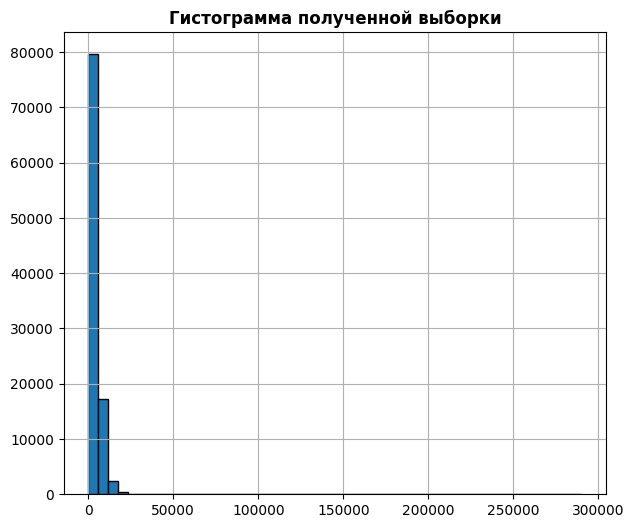

In [ ]:
plot.figure(figsize=(7,6))

# График:
plot.hist(data,
          bins=len(some_data[0]),
          edgecolor="black")

plot.title("Гистограмма полученной выборки", fontweight='bold')
plot.grid()
plot.show()

In [ ]:
# Оценка параметра распределения alpha:

# alpha = len(data) / sum(ln(x_i / theta))
from math import log

sum_x = 0
for info in data:
  sum_x += log(info / theta)
alpha = round(len(data) / sum_x, 7)

alpha_unbiased = alpha * (len(data) - 1) / (len(data)) # Эмпирическая формула несмещенной статистики

print(f"Оценка статистики alpha: {alpha}")
print(f"Несмещённая оценка статистики alpha_unbiased: {alpha_unbiased}")

Оценка статистики alpha: 0.1391369
Несмещённая оценка статистики alpha_unbiased: 0.13913550554926388


In [ ]:
# Определение функции-распрделения Парето:

def pareto_density(argument, theta_par: float = theta, alpha_par: float = alpha_unbiased):
  return (alpha_par / theta_par) * (theta_par / argument) ** (alpha_par + 1)

x = np.linspace(mini, maxi, 100) # Аргументы
y = [pareto_density(arg) for arg in x] # Значения по соотв. аргументам

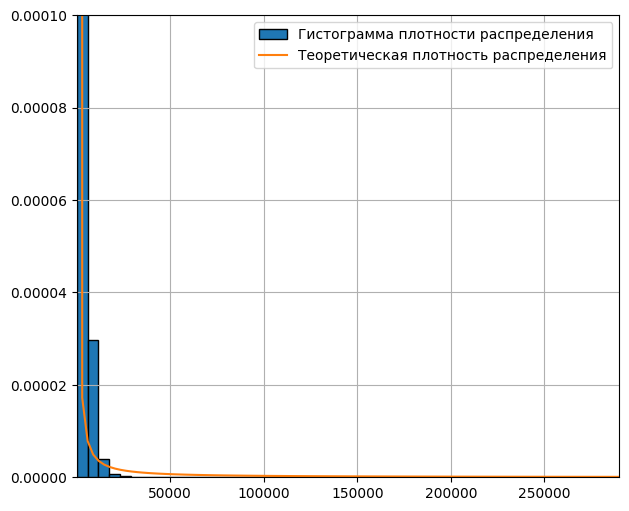

In [ ]:
plot.figure(figsize=(7,6))

# График:
plot.hist(data,
          bins=len(some_data[0]),
          density=True,
          edgecolor="black",
          label="Гистограмма плотности распределения")

plot.plot(x,
          y,
          label="Теоретическая плотность распределения")

plot.xlim(mini, maxi)
plot.ylim(0, 0.0001)
plot.legend(); plot.grid(); plot.show()

In [ ]:
int_edge = some_data[1] # Грани интервалов
int_hist = some_data[0] # Значения соотвествующие каждому интервалу

In [ ]:
emp_probability = [] # Эмпирические вероятности;
emp_frequency = [] # Эмпирические частоты;

for info in int_hist:
  emp_frequency.append(info)
  emp_probability.append(info / len(data))

print(f"Эмпирические частоты: {emp_frequency}")
print(f"Эмпирические вероятности: {emp_probability}")

Эмпирические частоты: [79595, 17210, 2313, 395, 110, 46, 20, 23, 11, 8, 5, 10, 8, 2, 4, 4, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3]
Эмпирические вероятности: [0.7977129456097977, 0.1724811834153479, 0.023181230519447982, 0.003958748834925184, 0.001102436384409545, 0.0004610188516621734, 0.00020044297898355365, 0.0002305094258310867, 0.0001102436384409545, 8.017719159342147e-05, 5.011074474588841e-05, 0.00010022148949177683, 8.017719159342147e-05, 2.0044297898355367e-05, 4.0088595796710734e-05, 4.0088595796710734e-05, 0.0, 5.011074474588841e-05, 5.011074474588841e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0022148949177684e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0022148949177684e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.006644684753305e-05]


In [ ]:
th_probability = [(1 - (theta / int_edge[index]) ** alpha) - (1 - (theta / int_edge[index - 1]) ** alpha) for index in range(1, len(int_edge))]
th_frequency  = [len(data) * x for x in th_probability]

print(sum(th_probability)) # Сумма теоретических вероятностей
print(th_probability) # Сами теоретические вероятности
print(th_frequency) # Теоретические частоты

0.8086403627478811
[0.6702237717798404, 0.03031170530720595, 0.016424364094112298, 0.011104470933669397, 0.008312571693480875, 0.006602979268369946, 0.005453596214029632, 0.004630528682466606, 0.004013638404518516, 0.003535026416184084, 0.0031534952032408192, 0.002842636313106328, 0.002584762088334136, 0.0023675929730170298, 0.0021823450459348415, 0.0020225736659579274, 0.0018834465485518814, 0.0017612713584761464, 0.0016531797609623533, 0.0015569107464625809, 0.0014706587158306306, 0.0013929648589952048, 0.0013226381139622712, 0.0012586967352561373, 0.0012003244765825816, 0.0011468373031332524, 0.0010976578015631233, 0.0010522952925834383, 0.0010103302200058506, 0.0009714017829749455, 0.0009351980534522131, 0.0009014480165694394, 0.0008699151121078774, 0.0008403919576795982, 0.0008126960094415603, 0.0007866659720756619, 0.0007621588116919487, 0.000739047257034442, 0.0007172176985663636, 0.0006965684136219785, 0.000677008060222084, 0.0006584543933989551, 0.0006408331666989397, 0.000624

In [ ]:
print(th_frequency)
print(emp_frequency)

[66874.25772442069, 3024.4716438477026, 1638.806624946431, 1107.9930052905988, 829.4200910038282, 658.8386684186848, 544.1543766396627, 462.0295214078355, 400.476826364453, 352.7214007804317, 314.6525978841657, 283.6354086854363, 257.90497641189177, 236.2360592546662, 217.75220633833254, 201.81037781561605, 187.92841316795818, 175.7378948773914, 164.95262336906265, 155.34699737128986, 146.74085600686448, 138.98864066568254, 131.97150837304144, 125.59150154712214, 119.7671759489334, 114.43027926933279, 109.52319778216687, 104.9969719986829, 100.80973902196376, 96.92549850345709, 93.31312657540836, 89.94558164528209, 86.7992599710119, 83.85346914531263, 81.08999512606944, 78.49274402773747, 76.04744407181094, 73.74139625963959, 71.56326474525319, 69.50289974278739, 67.55118724089932, 65.69992091895433, 63.94169254005351, 62.269797792736696, 60.67815510551863, 59.161235401844536, 57.71400111738292, 56.331853089294114, 55.010584160342866, 53.74633853010777]
[79595, 17210, 2313, 395, 110, 4

In [ ]:
# Построим статистику Хи_квадрат-выборочное:
chi_v = 0
for elements in zip(th_frequency[:-2], emp_frequency[:-2]):
  chi_v += ((elements[1] - elements[0]) ** 2) / elements[0]
print(chi_v)

qt_chi2 = ss.chi2.ppf(q=.95, df=47)
print(f"Вычисленный квантиль qt_chi2: {round(qt_chi2, 5)}")

77115.94335006706
Вычисленный квантиль qt_chi2: 64.00111
